In [1]:
import numpy as np
from numpy import linalg as LA
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import os
import h5py
import matplotlib.pyplot as plt
from scipy import spatial
import matplotlib.image as mpimg
from skimage import io, img_as_ubyte

In [2]:
input_shape=(224, 224, 3)

model = VGG19(weights='imagenet', input_shape=(input_shape[0], input_shape[1], input_shape[2]), pooling = 'max', include_top=False)


In [3]:
model.predict(np.zeros((1, 224, 224, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


array([[4.48303401e-01, 0.00000000e+00, 0.00000000e+00, 2.84858227e-01,
        8.92138958e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.20283812e-02, 0.00000000e+00,
        4.65520173e-01, 0.00000000e+00, 0.00000000e+00, 8.80752504e-01,
        0.00000000e+00, 4.81482327e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.66155712e-02, 0.00000000e+00, 8.21283162e-02,
        1.22575752e-01, 0.00000000e+00, 8.17030072e-01, 0.00000000e+00,
        2.84132689e-01, 0.00000000e+00, 6.24878287e-01, 0.00000000e+00,
        4.13837612e-01, 1.82653069e-02, 1.28934652e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.82241380e-01, 0.00000000e+00,
        0.00000000e+00, 7.84581676e-02, 0.00000000e+00, 1.43522099e-01,
        0.00000000e+00, 6.15550756e-01, 0.00000000e+00, 0.00000000e+00,
        1.01186052e-01, 0.00000000e+00, 5.55473149e-01, 1.505764

In [4]:
def vgg19_extract_feature(image_path):
    img = image.load_img(image_path, target_size=(input_shape[0], input_shape[1]))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    norm_features = features[0]/LA.norm(features[0])
    return norm_features

In [6]:
path = "/Users/sudipkhadka/Desktop/Computer-Vision2/Embedding_imges"

In [7]:
image_path = path + "/"

features = []
names = []
for img in os.listdir(image_path):
    if img==".DS_Store":
        continue
    X = vgg19_extract_feature(image_path+img)
    features.append(X)
    names.append(img)
features = np.array(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [8]:
output = "VGG19Features.h5"
h5f = h5py.File(output, "w")
h5f.create_dataset('dataset_1', data=features)
h5f.create_dataset('dataset_2', data=np.string_(names))
h5f.close()

In [9]:
h5f = h5py.File("VGG19Features.h5", "r")
features = h5f['dataset_1'][:]
image_name = h5f['dataset_2'][:]
h5f.close()

In [10]:
def reterive_similar_image(query_image_path):
    plt.imshow(io.imread(query_image_path))
    plt.title("Query Image")
    plt.show()  

    print("Reteriving Images.........")  
    X = vgg19_extract_feature(query_image_path)

    scores = []
    for i in range(features.shape[0]):
        score  = 1 - spatial.distance.cosine(X, features[i])
        scores.append(score)
    scores = np.array(scores)
    rank_id = np.argsort(scores)[::-1]
    rank_score = scores[rank_id]

    n = 10
    lists = [os.path.join(path, image_name[index].decode('utf-8')) if isinstance(image_name[index], bytes) else os.path.join(path, image_name[index]) 
         for i, index in enumerate(rank_id[0:n])]

    num_images = len(lists)
    fig, axes = plt.subplots(1, num_images, figsize=(17, 7))
    for i, image_path in enumerate(lists):
        if os.path.exists(image_path):
            img = mpimg.imread(image_path)  
            axes[i].imshow(img)  
            axes[i].axis('off')  
            axes[i].set_title(f"Image Rank {i+1}")
        else:
            print(f"File not found: {image_path}") 
    plt.show()

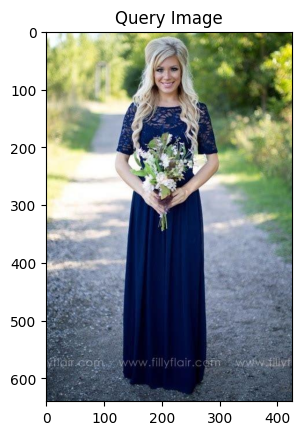

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


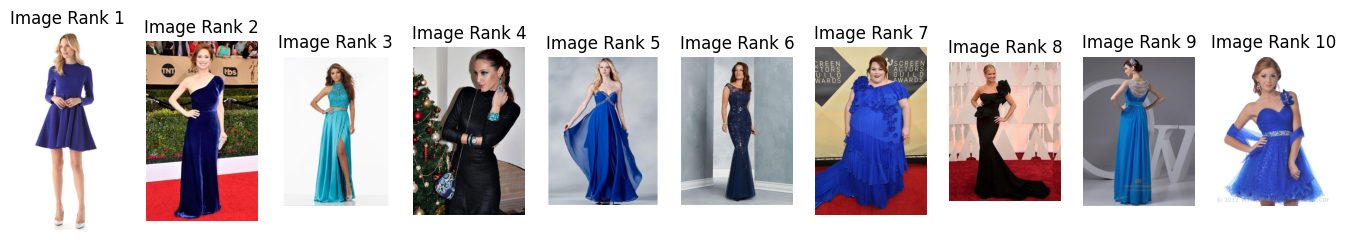

In [11]:
reterive_similar_image("/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa3b752a3b52957ec859b26b5dbf7457e8af2513.jpg")

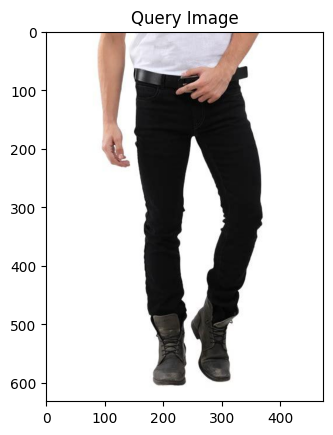

Reteriving Images.........
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


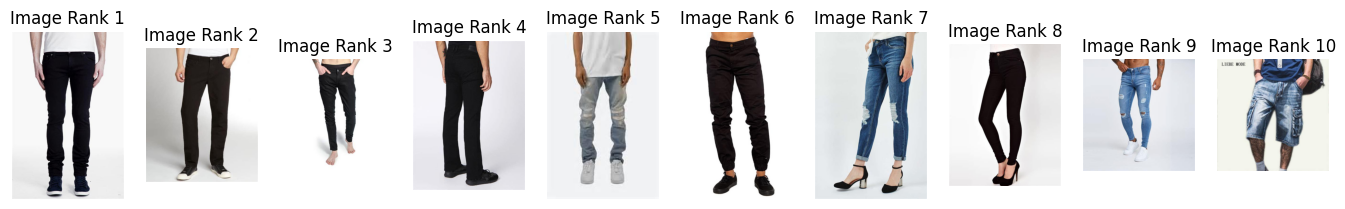

In [12]:
reterive_similar_image('/Users/sudipkhadka/Desktop/Computer-Vision2/query_image/fa60dbf6735fbf1b90977e531d4a4023fc5ec34b.jpg')